# Email Marketing Campaign


## Goal


Optimizing marketing campaigns is one of the most common data science tasks. Among the many possible marketing tools, one of the most efficient is emails.

Emails are great because they are free, scalable, and can be easily personalized. Email optimization involves personalizing the text and/or the subject, who should receive it, when should be sent, etc. Machine Learning excels at this.




## Challenge Description


The marketing team of an e-commerce site has launched an email campaign. This site has email addresses from all the users who created an account in the past.

They have chosen a random sample of users and emailed them. The email lets the user know about a new feature implemented on the site. From the marketing team perspective, success is if the user clicks on the link inside of the email. This link takes the user to the company site.

You are in charge of figuring out how the email campaign performed and were asked the following questions:

- What percentage of users opened the email and what percentage clicked on the link within the email?


- The VP of marketing thinks that it is stupid to send emails in a random way. Based on all the information you have about the emails that were sent, can you build a model to optimize in future how to send emails to maximize the probability of users clicking on the link inside the email?


- By how much do you think your model would improve click through rate (defined as # of users who click on the link/total users who receive the email). How would you test that?


- Did you find any interesting pattern on how the email campaign performed for different segments of users? Explain.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls

07_Email _Marketing_Campaign.ipynb  email_table.csv
email.zip                           link_clicked_table.csv
email_opened_table.csv


In [3]:
df_email = pd.read_csv('email_table.csv')
df_email.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


- email_id : the Id of the email that was sent. It is unique by email.
- email_text : there are two versions of the email: one has “long text” (i.e. has 4 paragraphs) and one has “short text” (just two paragraphs)
- email_version : some emails were “personalized” (i.e. they had the name of the user receiving the email in the incipit, such as “Hi John”), while some emails were “generic” (the incipit was just “Hi,”).
- hour : the local time on which the email was sent.
- weekday : the day on which the email was sent.
- user_country : the country where the user receiving the email was based. It comes from the user ip address when she created the account.
- user_past_purchases : how many items in the past were bought by the user receiving the email

In [4]:
df_open = pd.read_csv('email_opened_table.csv')
df_open.head()

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034


email_id : the id of the emails that were opened, i.e. the user clicked on the email and, supposedly, read it.

In [5]:
df_click = pd.read_csv('link_clicked_table.csv')
df_click.head()

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561


email_id : if the user clicked on the link within the email, then the id of the email shows up on this table.

In [6]:
df_email.isnull().sum()

email_id               0
email_text             0
email_version          0
hour                   0
weekday                0
user_country           0
user_past_purchases    0
dtype: int64

In [7]:
df_open.isnull().sum()

email_id    0
dtype: int64

In [8]:
df_click.isnull().sum()

email_id    0
dtype: int64

In [9]:
df_open['open']=1
df = pd.merge(df_email,df_open,how = 'left',on = 'email_id')
df.head(10)

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,open
0,85120,short_email,personalized,2,Sunday,US,5,NaN
1,966622,long_email,personalized,12,Sunday,UK,2,1.0
2,777221,long_email,personalized,11,Wednesday,US,2,NaN
3,493711,short_email,generic,6,Monday,UK,1,NaN
4,106887,long_email,generic,14,Monday,US,6,NaN
5,684440,long_email,personalized,6,Sunday,UK,3,NaN
6,139620,short_email,personalized,9,Saturday,US,8,1.0
7,694933,long_email,generic,8,Saturday,US,2,NaN
8,485760,long_email,personalized,5,Monday,US,4,NaN
9,592665,short_email,personalized,23,Wednesday,US,3,NaN


In [10]:
df_click['click'] = 1
df = pd.merge(df,df_click,how = 'left',on = 'email_id')
df.head(10)

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,open,click
0,85120,short_email,personalized,2,Sunday,US,5,NaN,NaN
1,966622,long_email,personalized,12,Sunday,UK,2,1.0,1.0
2,777221,long_email,personalized,11,Wednesday,US,2,NaN,NaN
3,493711,short_email,generic,6,Monday,UK,1,NaN,NaN
4,106887,long_email,generic,14,Monday,US,6,NaN,NaN
5,684440,long_email,personalized,6,Sunday,UK,3,NaN,NaN
6,139620,short_email,personalized,9,Saturday,US,8,1.0,NaN
7,694933,long_email,generic,8,Saturday,US,2,NaN,NaN
8,485760,long_email,personalized,5,Monday,US,4,NaN,NaN
9,592665,short_email,personalized,23,Wednesday,US,3,NaN,NaN


In [11]:
df.fillna(0,inplace = True)
df[['open','click']] = df[['open','click']].astype(int)
df.head(10)

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,open,click
0,85120,short_email,personalized,2,Sunday,US,5,0,0
1,966622,long_email,personalized,12,Sunday,UK,2,1,1
2,777221,long_email,personalized,11,Wednesday,US,2,0,0
3,493711,short_email,generic,6,Monday,UK,1,0,0
4,106887,long_email,generic,14,Monday,US,6,0,0
5,684440,long_email,personalized,6,Sunday,UK,3,0,0
6,139620,short_email,personalized,9,Saturday,US,8,1,0
7,694933,long_email,generic,8,Saturday,US,2,0,0
8,485760,long_email,personalized,5,Monday,US,4,0,0
9,592665,short_email,personalized,23,Wednesday,US,3,0,0


In [12]:
df.dtypes

email_id                int64
email_text             object
email_version          object
hour                    int64
weekday                object
user_country           object
user_past_purchases     int64
open                    int64
click                   int64
dtype: object

## Question 1

What percentage of users opened the email and what percentage clicked on the link within the email?

In [13]:
# open rate:

df.open.mean()

0.10345

In [14]:
# click rate:

df.click.mean()

0.02119

The weird thing is that some emai ids show open = 0 but click = 1.

In [15]:
df[(df.open == 0) & (df.click == 1)]

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,open,click
3156,104883,long_email,generic,14,Friday,US,7,0,1
3527,446716,short_email,generic,14,Saturday,US,4,0,1
5724,742967,long_email,personalized,14,Saturday,ES,2,0,1
7202,841517,long_email,personalized,7,Wednesday,FR,1,0,1
10660,507413,short_email,generic,7,Saturday,FR,2,0,1
11255,123727,short_email,personalized,5,Sunday,US,7,0,1
13104,403381,long_email,generic,12,Saturday,US,6,0,1
15537,931469,long_email,personalized,14,Sunday,UK,6,0,1
16440,954218,long_email,generic,5,Wednesday,FR,4,0,1
17535,547593,long_email,generic,10,Friday,US,1,0,1


In [16]:
# correct this issue:

df['open'][(df.open == 0) & (df.click == 1)] = 1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
df.open.mean()

0.10395

## Question 2

The VP of marketing thinks that it is stupid to send emails in a random way. Based on all the information you have about the emails that were sent, can you build a model to optimize in future how to send emails to maximize the probability of users clicking on the link inside the email?

In [18]:
df['send']=1

In [19]:
df_email_text = df.groupby('email_text')['send','click'].sum().reset_index()
df_email_text['conversion'] = df_email_text.click/df_email_text.send
df_email_text

,email_text,send,click,conversion
0,long_email,50276,932,0.018538
1,short_email,49724,1187,0.023872


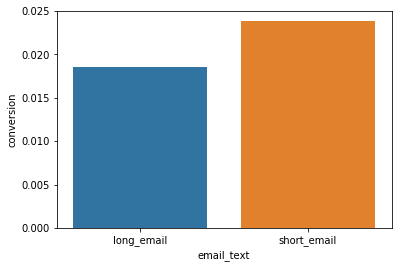

In [20]:
sns.barplot(x = 'email_text',y = 'conversion',data = df_email_text)

Shor Emails are better. 

In [21]:
df_version = df.groupby('email_version')['send','click'].sum().reset_index()
df_version['conversion'] = df_version.click/df_version.send
df_version

,email_version,send,click,conversion
0,generic,50209,760,0.015137
1,personalized,49791,1359,0.027294


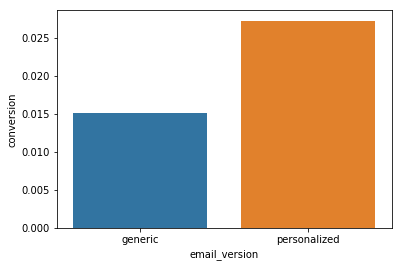

In [22]:
sns.barplot(df_version.email_version,df_version.conversion)

Personalized is better.

In [23]:
df_hour = df.groupby('hour')['send','click'].sum().reset_index()
df_hour['conversion'] = df_hour.click/df_hour.send
df_hour

,hour,send,click,conversion
0,1,2703,49,0.018128
1,2,3676,60,0.016322
2,3,4610,90,0.019523
3,4,5622,91,0.016186
4,5,6551,118,0.018013
5,6,7465,128,0.017147
6,7,8204,150,0.018284
7,8,8398,159,0.018933
8,9,8529,220,0.025794
9,10,8180,231,0.028240


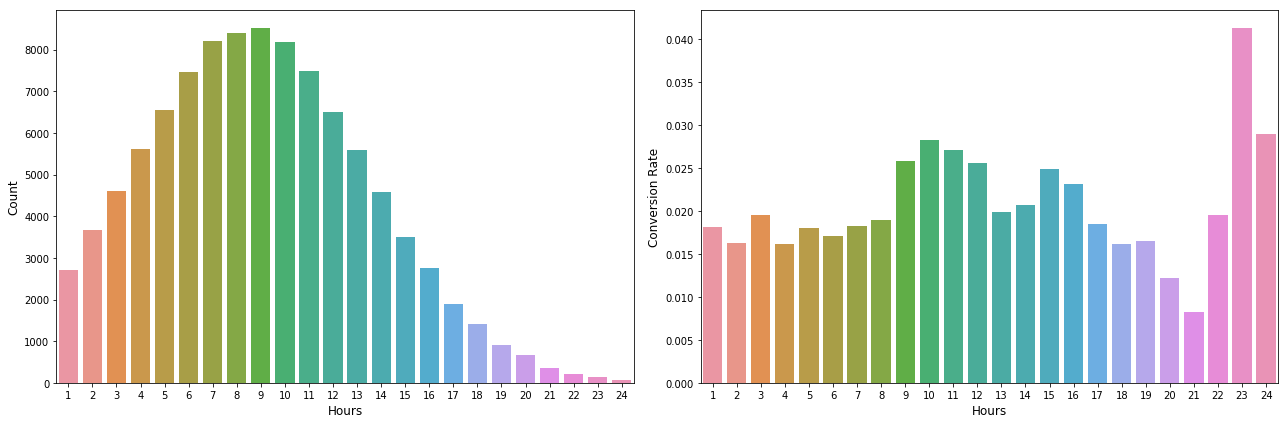

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.barplot(x = df_hour.hour, y = df_hour.send, ax=ax[0])
ax[0].set_xlabel('Hours', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)

sns.barplot(x = df_hour.hour, y = df_hour.conversion, ax=ax[1])
ax[1].set_xlabel('Hours', fontsize=12)
ax[1].set_ylabel('Conversion Rate', fontsize=12)
plt.tight_layout()
plt.show()

In [25]:
df_weekday = df.groupby('weekday')['send','click'].sum().reset_index()
df_weekday['conversion'] = df_weekday.click / df_weekday.send
df_weekday

,weekday,send,click,conversion
0,Friday,14177,199,0.014037
1,Monday,14363,329,0.022906
2,Saturday,14569,260,0.017846
3,Sunday,14387,241,0.016751
4,Thursday,14277,349,0.024445
5,Tuesday,14143,352,0.024889
6,Wednesday,14084,389,0.027620


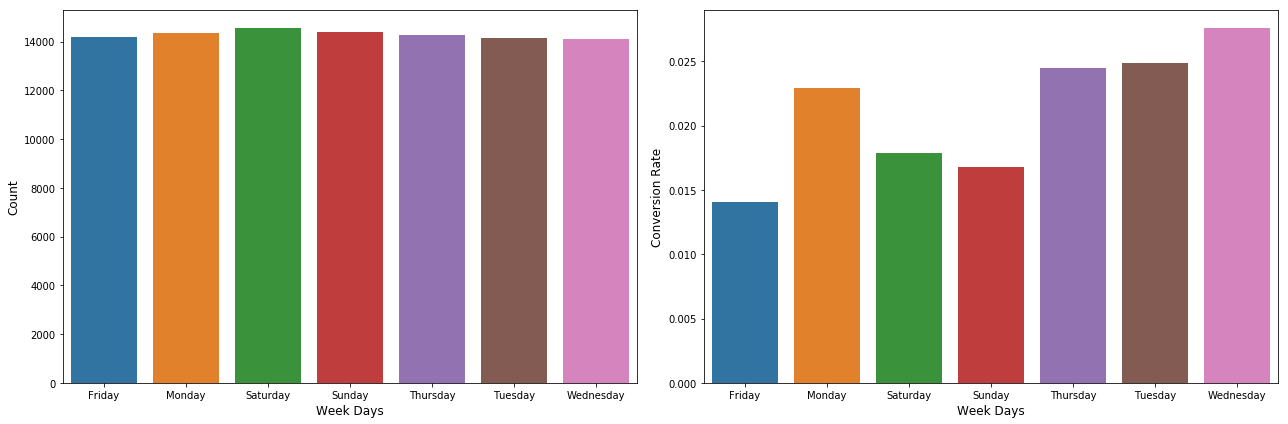

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.barplot(df_weekday.weekday, df_weekday.send, ax=ax[0])
ax[0].set_xlabel('Week Days', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)

sns.barplot(df_weekday.weekday, df_weekday.conversion, ax=ax[1])
ax[1].set_xlabel('Week Days', fontsize=12)
ax[1].set_ylabel('Conversion Rate', fontsize=12)
plt.tight_layout()
plt.show()

In [27]:
df_country = df.groupby('user_country')['send','click'].sum().reset_index()
df_country['conversion'] = df_country.click/df_country.send
df_country

,user_country,send,click,conversion
0,ES,9967,83,0.008327
1,FR,9995,80,0.008004
2,UK,19939,492,0.024675
3,US,60099,1464,0.024360


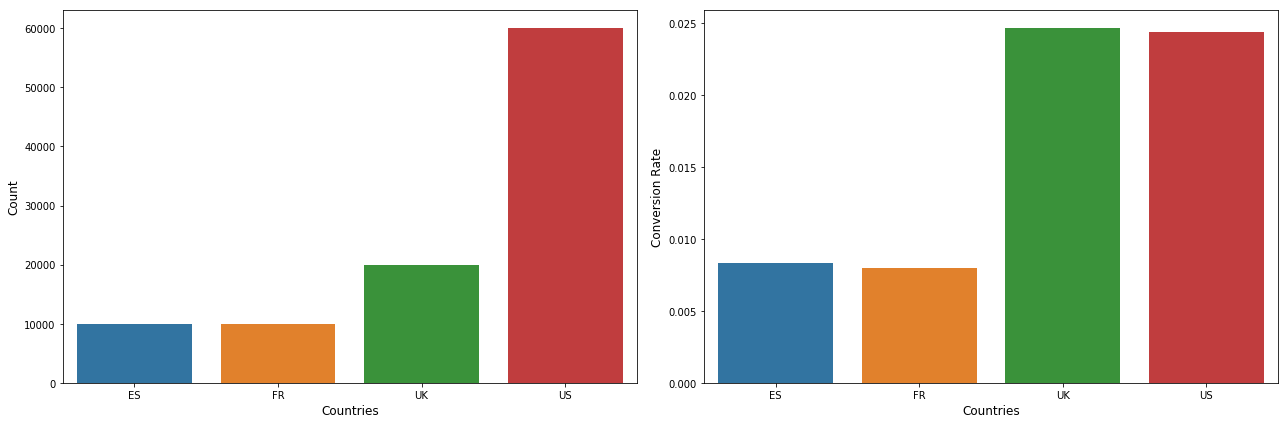

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.barplot(df_country.user_country, df_country.send, ax=ax[0])
ax[0].set_xlabel('Countries', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)

sns.barplot(df_country.user_country, df_country.conversion, ax=ax[1])
ax[1].set_xlabel('Countries', fontsize=12)
ax[1].set_ylabel('Conversion Rate', fontsize=12)
plt.tight_layout()
plt.show()

US has dramatically highest click rate. 

In [29]:
df_purchases = df.groupby('user_past_purchases')['send','click'].sum().reset_index()
df_purchases['conversion'] = df_purchases.click/df_purchases.send
df_purchases

,user_past_purchases,send,click,conversion
0,0,13877,7,0.000504
1,1,13751,154,0.011199
2,2,13036,200,0.015342
3,3,12077,200,0.016560
4,4,10743,230,0.021409
5,5,9042,201,0.022230
6,6,7518,241,0.032056
7,7,6051,186,0.030739
8,8,4393,174,0.039608
9,9,3296,150,0.045510


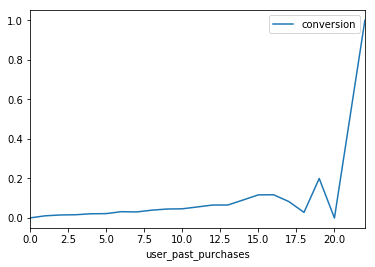

In [30]:
df_purchases.plot(x = 'user_past_purchases', y = 'conversion')

## Machine Learning Modeling 

It does not work well, because the data is supper unbalanced. Even I got a pretty good accuracy, this is not very useful.

In [31]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None) 


df_ML = df[df.user_past_purchases <=16].drop(['email_id','open','send'],axis=1)
df_ML = pd.get_dummies(df_ML)
df_ML

,hour,user_past_purchases,click,email_text_long_email,email_text_short_email,email_version_generic,email_version_personalized,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,user_country_ES,user_country_FR,user_country_UK,user_country_US
0,2,5,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1
1,12,2,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2,11,2,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,6,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0
4,14,6,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
5,6,3,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
6,9,8,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
7,8,2,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
8,5,4,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1
9,23,3,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1


In [33]:
X = df_ML.drop('click',axis=1)
features = list(X.columns)
y = df_ML.click

In [34]:
y.value_counts()

0    97767
1     2107
Name: click, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

Using TensorFlow backend.


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
logreg =LogisticRegression(penalty='l2', solver='lbfgs', class_weight = 'balanced')

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred)

print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

print("confusion matrix: \n", metrics.confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.0768231046931408
0.04072883172561629
0.6751269035532995
confusion matrix: 
 [[13316  6265]
 [  128   266]]
              precision    recall  f1-score   support

           0       0.99      0.68      0.81     19581
           1       0.04      0.68      0.08       394

    accuracy                           0.68     19975
   macro avg       0.52      0.68      0.44     19975
weighted avg       0.97      0.68      0.79     19975



In [38]:
importances = abs(logreg.coef_[0])
#importances
feat_importances = pd.Series(importances,index=features)
feat_importances.sort_values(ascending=False)

user_country_FR               0.794414
user_country_ES               0.714790
email_version_generic         0.695490
email_text_long_email         0.493484
weekday_Friday                0.480417
user_country_US               0.405819
user_country_UK               0.394515
weekday_Sunday                0.336019
weekday_Saturday              0.267934
email_text_short_email        0.215386
user_past_purchases           0.211000
weekday_Wednesday             0.184194
weekday_Tuesday               0.080692
weekday_Thursday              0.074985
weekday_Monday                0.035629
hour                          0.017418
email_version_personalized    0.013380
dtype: float64

In [39]:
DT = DecisionTreeClassifier(min_samples_split=3,random_state=20, class_weight = 'balanced')

DT.fit(X_train,y_train)
y_pred =DT.predict(X_test)
fpr_dt, tpr_dt, _= roc_curve(y_test, y_pred)
print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

print(metrics.confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.04684808818463659
0.027102431247508968
0.17258883248730963
[[17140  2441]
 [  326    68]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     19581
           1       0.03      0.17      0.05       394

    accuracy                           0.86     19975
   macro avg       0.50      0.52      0.49     19975
weighted avg       0.96      0.86      0.91     19975



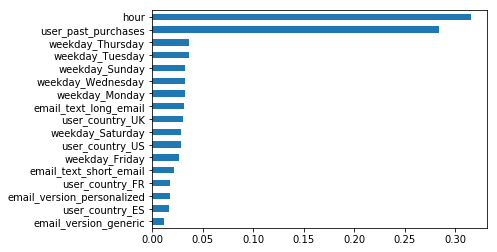

In [40]:
feat_importances = pd.Series(DT.feature_importances_,index=features)
feat_importances.sort_values().plot(kind='barh')
plt.show()

In [41]:
feat_importances.sort_values(ascending=False)

hour                          0.315517
user_past_purchases           0.284068
weekday_Thursday              0.036455
weekday_Tuesday               0.036196
weekday_Sunday                0.032563
weekday_Wednesday             0.032226
weekday_Monday                0.032140
email_text_long_email         0.031818
user_country_UK               0.030329
weekday_Saturday              0.029027
user_country_US               0.028618
weekday_Friday                0.026467
email_text_short_email        0.021234
user_country_FR               0.017769
email_version_personalized    0.017627
user_country_ES               0.016294
email_version_generic         0.011651
dtype: float64

In [42]:
dummy_hour = pd.get_dummies(X.hour,'hour')
dummy_hour.head()

,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [43]:
df_ML = pd.merge(df_ML,dummy_hour,on=df_ML.index)
df_ML = df_ML.drop('key_0',axis=1)
df_ML.head(10)

,hour,user_past_purchases,click,email_text_long_email,email_text_short_email,email_version_generic,email_version_personalized,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,user_country_ES,user_country_FR,user_country_UK,user_country_US,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24
0,2,5,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12,2,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,11,2,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,14,6,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,6,3,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,9,8,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8,2,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5,4,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,23,3,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [44]:
df_ML = df_ML.drop('hour',axis=1)

In [45]:
X = df_ML.drop(['click'],axis=1)
y = df_ML.click

features = list(X.columns)

In [46]:
y.value_counts()

0    97767
1     2107
Name: click, dtype: int64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
y_test.value_counts()

0    19581
1      394
Name: click, dtype: int64

In [49]:
DT = DecisionTreeClassifier(min_samples_split=3,random_state=20, class_weight = 'balanced')

DT.fit(X_train,y_train)
y_pred =DT.predict(X_test)
fpr_dt, tpr_dt, _= roc_curve(y_test, y_pred)
print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

print(metrics.confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.04648029639609296
0.02679611650485437
0.1751269035532995
[[17075  2506]
 [  325    69]]
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     19581
           1       0.03      0.18      0.05       394

    accuracy                           0.86     19975
   macro avg       0.50      0.52      0.48     19975
weighted avg       0.96      0.86      0.91     19975



In [50]:
feat_importances = pd.Series(DT.feature_importances_,index=features)
feat_importances.sort_values(ascending=False)

user_past_purchases           0.270533
weekday_Tuesday               0.033488
hour_10                       0.031130
user_country_UK               0.030806
weekday_Monday                0.028297
weekday_Sunday                0.027401
weekday_Wednesday             0.027363
hour_12                       0.027250
weekday_Thursday              0.026968
email_text_long_email         0.026423
hour_14                       0.025346
weekday_Friday                0.025206
user_country_US               0.025153
hour_8                        0.024376
hour_7                        0.023723
hour_6                        0.023506
hour_11                       0.023153
weekday_Saturday              0.022470
hour_2                        0.021865
hour_5                        0.021322
hour_4                        0.021129
hour_9                        0.020526
user_country_FR               0.018547
hour_3                        0.018277
hour_13                       0.017888
user_country_ES          

In [51]:
rf_model = RandomForestClassifier(n_estimators=200, max_features = 5,random_state=20, class_weight = 'balanced')
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
fpr_rf, tpr_rf, _= roc_curve(y_test, y_pred)
print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

print(metrics.confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.04825506247307196
0.029060716139076286
0.14213197969543148
[[17710  1871]
 [  338    56]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     19581
           1       0.03      0.14      0.05       394

    accuracy                           0.89     19975
   macro avg       0.51      0.52      0.49     19975
weighted avg       0.96      0.89      0.92     19975



## Question 3:

By how much do you think your model would improve click through rate (defined as # of users who click on the link/total users who receive the email). How would you test that?

From [this link](https://github.com/dongzhang84/DS-Take-Home/blob/master/07.%20Marketing%20Email%20Campaign.ipynb)

Based on the model built previously, the company can send email to selected users that are predicted to have higher probability to click the link.

To test it, we can conduct A/B test to see if the built model can actually help improve the click-through-rate.

- Randomly assign users to two groups, Control group and Experiment group.
- In Control group, still use the old email-campaign strategy, i.e., just send emails to all users in Control group.
- In Experiment group, use my model to predict whether the user will click the link or not. and only send emails to those users whose predictive result is positive.
- Preform a one-tail unpaired t-test to test whether Experiement group's population proportion is higher than Control group's population proportion.